## Increment 1

In [5]:
#The Dark Knight (2008)

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementNotVisibleException
from bs4 import BeautifulSoup
import time
import urllib.request
from selenium import webdriver

In [6]:
 driver = webdriver.Chrome("C:\Webdriver/chromedriver.exe")
driver.get("https://www.imdb.com/title/tt0468569/reviews?ref_=tt_ql_3")

button = driver.find_element_by_id('load-more-trigger')
key = True
while key:
    time.sleep(1)
    try:
        button.click()
        button = driver.find_element_by_id('load-more-trigger')
    except:
        key = False

In [7]:
html = driver.page_source
soup = BeautifulSoup(html.encode("utf-8"), "html.parser")
TheDarkKnight = soup.find_all('div', class_ = 'content')

In [8]:
print(type(TheDarkKnight))
print(len(TheDarkKnight))

<class 'bs4.element.ResultSet'>
6597


In [9]:
brothListReviewsOnly = []
brothList = soup.select(".review-container")
temp = 1
for item in range(0,len(brothList)):
    title = brothList[item].select(".title")[0].text
    review = brothList[item].select(".text")[0].text
    brothListReviewsOnly.append(review)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project\AllReviews_beforeCleaning\r' +str(temp) +'.txt', 'w', encoding='utf-8')
    temp = temp+1
#     print(review +"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    file.write(str(review))
file.close()

In [10]:
print(len(brothListReviewsOnly))

6597


In [24]:


import string
translator = str.maketrans('', '', string.punctuation)
brothList = soup.select(".review-container")
for item in range(0,len(brothList)):
    review = brothList[item].select(".text")[0].text.translate(translator)
    brothListReviewsOnly[item] = review.translate(translator)

In [25]:
brothListReviewsOnly[1]

'I got to see The Dark Knight on Wednesday night the reason though why Im writing this movie comment this late is because I didnt wanna just jump and say this movie was awesome I wanted to think it through still today I cant stop thinking about this movie The Dark Knight lives up to its hype and goes beyond it this is the Batman movie that goes where no other Batman movie has gone before It gave us a real sold story we are finally told why the villains are the way they are how all the injustice in the world can get underneath Batmans skin how you have to believe that people still have faith in good on Earth Heath Ledger I absolutely loved Jack Nicolsons performance in the 1989 film when I first read that Heath was signed onto The Dark Knight I was like What are they kidding once you see The Dark Knight Heath was incredible Im not going to compare Jack and Heaths performance because they were two different versions of the Joker but Heaths Joker was definitely the more scary and intense 

In [26]:
len(str(brothListReviewsOnly))

8487875

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import pos_tag, word_tokenize

In [28]:
#part2

stop = set(stopwords.words('english'))
temp = 1
for x in range(0,len(brothListReviewsOnly)):             
    filtered_words = [i for i in word_tokenize(brothListReviewsOnly[x].lower()) if i not in stop]
    brothListReviewsOnly[x] = " ".join(filtered_words)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project\AllReviews_afterCleaning\r' +str(temp) +'.txt', 'w', encoding='utf-8')
    temp = temp + 1
    file.write(str(brothListReviewsOnly[x]))
file.close()

In [29]:
brothListReviewsOnly[1]

'got see dark knight wednesday night reason though im writing movie comment late didnt wan na jump say movie awesome wanted think still today cant stop thinking movie dark knight lives hype goes beyond batman movie goes batman movie gone gave us real sold story finally told villains way injustice world get underneath batmans skin believe people still faith good earth heath ledger absolutely loved jack nicolsons performance 1989 film first read heath signed onto dark knight like kidding see dark knight heath incredible im going compare jack heaths performance two different versions joker heaths joker definitely scary intense two nominations didnt know going next crazy also charismatic point could relate character worst part hes crazy hes driving gotham crazy treating everyone like little puppets strings control guess well smile face much batman film much comic book film dark knight truly delivers drama action romance horror dark humor study psychopathic killer detective story force behi

In [30]:
len(brothListReviewsOnly)

6597

### Getting the numbers of positive and negative reviews and append them in each file

In [31]:
import os

path = r"C:\Users\Saeed\Desktop\KDM_Project\AllReviews_afterCleaning"

In [32]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

In [33]:
reviews_from_file = []

#with open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\all_Reviews.txt','w', encoding='utf8', errors='ignore') as f:
for x in files:
    with open(x,'r', encoding='utf8', errors='ignore') as y:
        #first_line = x.readline()
        for text in y:
            reviews_from_file.append(text)
            #f.write(text)
#f.close()

In [34]:
#sent = reviews_from_file[50]
#sent = "I like this project"

In [42]:
with open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\all_Reviews.txt','w', encoding='utf8', errors='ignore') as f:
    for x in reviews_from_file:
        f.write(x)
        f.write('\n')
    f.close()

In [43]:
# with open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\all_Reviews.txt','r', encoding='utf8', errors='ignore') as f:
#     for line in f:
#         #AllReviews = review_text.splitlines()
#         print(line)
#         break

In [44]:
from pycorenlp import StanfordCoreNLP
import json

In [47]:
nlp = StanfordCoreNLP('http://localhost:9000')
#Sentiment_Reviews = reviews_from_file[7]
all_review_sentiment= []
for x in range (len(reviews_from_file)):
    results = nlp.annotate(reviews_from_file[x],properties={
        'annotators':'sentiment,ner, pos',
        'outputFormat': 'json',
        'timeout': 50000
        })
    #all_review_sentiment.append(results["sentences"]["sentiment"])
    for s in results["sentences"]:
        #print(s["sentiment"])
        all_review_sentiment.append(s["sentiment"])

In [48]:
len(reviews_from_file)

6596

### calculating the number of positve and neagtive and give the rating

In [49]:
sent_dict = {}
for y in range (len(all_review_sentiment)):
    if all_review_sentiment[y] in sent_dict:
        sent_dict.update({all_review_sentiment[y]:sent_dict[all_review_sentiment[y]] + 1})
    else:
        sent_dict.update({all_review_sentiment[y]:1})
print(sent_dict)

{'Positive': 2165, 'Neutral': 477, 'Negative': 2994, 'Verynegative': 489, 'Verypositive': 471}


In [50]:
sent_negative = sent_dict['Verynegative'] + sent_dict['Negative']
print(sent_negative)

3483


In [51]:
sent_positive = sent_dict['Positive'] + sent_dict['Verypositive']
print(sent_positive)

2636


In [67]:
negative_rating = (sent_negative / len(reviews_from_file))* 10
print(int(negative_rating))

5


In [69]:
positive_rating = (sent_positive / len(reviews_from_file))* 10
print(positive_rating)

3.9963614311704063


### Filltering the data and Tokenizing the positve and negative reviews

In [70]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [73]:
print(len(reviews_from_file))
print(len(all_review_sentiment))

6596
6596


In [109]:
def filter_data():
    
    positiveReviews = []
    negativeReviews = []
    naturalReviews = []

    for x in range(0,len(reviews_from_file)):
        word_data = nltk.word_tokenize(reviews_from_file[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        reviews_from_file[x] = " ".join(CleanWordsFormat)

    for y in range(0, len(all_review_sentiment)):
        sent_rating = all_review_sentiment[y]
        text = reviews_from_file[y] #sent_rating[1].get_text()

        if sent_rating == 'Positive' or sent_rating == 'Verypositive':
            positiveReviews.append(text)
        elif sent_rating == 'Negative' or sent_rating == 'Verynegative':
            negativeReviews.append(text)
        else:
            naturalReviews.append(text)
            
    return positiveReviews, negativeReviews, naturalReviews

In [204]:
po, ne, nu = filter_data()

print(po[0])

confidently directed dark brooding packed impressive action sequence complex story dark knight includes careerdefining turn heath ledger well oscar worthy performance tdk remains best batman movie comic book movie ever created


In [115]:
positiveReviews[0]

'confidently directed dark brooding packed impressive action sequence complex story dark knight includes careerdefining turn heath ledger well oscar worthy performance tdk remains best batman movie comic book movie ever created'

In [97]:

def tokenize_data():
    
    positiveReviews_t = []
    negativeReviews_t = []
    naturalReviews_t = [] 
    for x in range(0,len(positiveReviews)):
        word_data = nltk.word_tokenize(positiveReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        positiveReviews_t.append(CleanWordsFormat)


    for x in range(0,len(negativeReviews)):
        word_data = nltk.word_tokenize(negativeReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        negativeReviews_t.append(CleanWordsFormat)


    for x in range(0,len(naturalReviews)):
        word_data = nltk.word_tokenize(naturalReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        naturalReviews_t.append(CleanWordsFormat)
        
    return positiveReviews_t, negativeReviews_t, naturalReviews_t 


In [98]:
print(positiveReviews_t[10])

['watching', 'movie', 'one', 'realize', 'time', 'pa', 'get', 'much', 'involved', 'loose', 'track', 'time', 'must', 'watch', 'actor', 'good', 'story', 'good', 'action', 'sequence', 'good', 'cant', 'think', 'something', 'dont', 'like', 'movie', 'great', 'work', 'enjoyed', 'every', 'minute', 'normally', 'guess', 'would', 'happen', 'movie', 'near', 'end', 'dark', 'knight', 'easy', 'predict', 'outcome', 'scene', 'even', 'easy', 'imagine', 'story', 'would', 'end', 'take', 'three', 'hour', 'normal', 'busy', 'life', 'watch', 'movie', 'sure', 'feel', 'disappointed', 'end', 'definitely', 'way', 'better', 'super', 'hero', 'movie', 'hero', 'always', 'right', 'thing', 'without', 'logic']


In [83]:
# negativeReviews_t = []
# for x in range(0,len(negativeReviews)):
#     word_data = nltk.word_tokenize(negativeReviews[x])
#     wordnet_lemmatizer = nltk.WordNetLemmatizer()
#     CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
#     negativeReviews_t.append(CleanWordsFormat)

In [99]:
print(negativeReviews_t[1])

['rare', 'see', 'movie', 'much', 'hype', 'live', 'even', 'rare', 'surpass', 'expectation', 'every', 'way', 'fromhe', 'plot', 'acting', 'everything', 'movie', 'opinion', 'perfect', 'sure', 'people', 'say', 'running', 'time', 'two', 'half', 'hour', 'long', 'well', 'ever', 'say', 'fcking', 'wrong', 'remind', 'academy', 'possible', 'make', 'blockbuster', 'masterpiece', 'possible', 'great', 'action', 'actingheath', 'ledger', 'cemented', 'place', 'cinema', 'history', 'role', 'twisted', 'sick', 'version', 'joker', 'created', 'stand', 'test', 'time', 'one', 'character', 'talked', 'long', 'gone', 'jacky', 'n', 'look', 'becoming', 'nothing', 'memory', 'thing', 'came', 'went', 'ledger', 'performance', 'make', 'jack', 'look', 'like', 'b', 'performanceleaving', 'theater', 'heard', 'around', 'talk', 'jokerunfortunately', 'feel', 'cast', 'looked', 'arron', 'played', 'incredible', 'harvey', 'dent', 'twoface', 'well', 'turn', 'dark', 'side', 'believable', 'freaky', 'bale', 'yet', 'amazing', 'batman', '

In [100]:
print(len(negativeReviews_t))

3483


In [101]:
print(len(naturalReviews_t))

477


In [102]:
file = open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\positve_Reviews_t.txt','w', encoding='utf8', errors='ignore')
for z in range(0,len(positiveReviews_t)):
    file.write(str(positiveReviews_t[z]))
file.close()

file = open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\negative_Reviews_t.txt','w', encoding='utf8', errors='ignore')
for f in range(0,len(negativeReviews_t)):
    file.write(str(negativeReviews_t[f]))
file.close()
  
    
file = open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\natural_Reviews_t.txt','w', encoding='utf8', errors='ignore')   
for k in range(0,len(naturalReviews_t)):
    file.write(str(naturalReviews_t[k]))
file.close()

###  Top words

In [180]:

def count_allPositiveWords():
    
    allPositve = " ".join(positiveReviews)
    splitPositive = allPositve.split(" ")
    positiveFrequency = nltk.FreqDist(splitPositive)
    
    # print(allPositve)
    # print(" ")
    tempArray_p = []
    for word, frequency in positiveFrequency.most_common():
        tempArray_p.append(u'{}:{}'.format(word, frequency) + "\n")
        
    tempString_p = " ".join(tempArray_p)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project\CountWords\PositiveFreq.txt', 'w', encoding='utf-8') 
    file.write(tempString_p)
    file.close()
    return tempString_p
   

In [202]:
# frq_p = count_allPositiveWords()
# print(frq_p)

In [201]:
# print(allPositve)

In [197]:
def count_allNegativeWords():   
    allNegative = " ".join(negativeReviews)
    splitnegative = allNegative.split(" ")
    negativeFrequency = nltk.FreqDist(splitnegative)
    # print(allNegative)
    # print(" ")
    tempArray_n = []
    for word, frequency in negativeFrequency.most_common():
        tempArray_n.append(u'{}:{}'.format(word, frequency) + "\n")

    tempString_n = " ".join(tempArray_n)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project\CountWords\negativeFreq.txt', 'w', encoding='utf-8') 
    file.write(tempString_n)
    file.close()

    return tempString_n

In [203]:
# frq_n = count_allNegativeWords()
# print(frq_n)

In [194]:
print(allNegative)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### WordCloud/ Mask

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [159]:
mask = np.array(Image.open("C:\\Users\\Saeed\\Desktop\\KDM_Project\\wine_mask.png"))

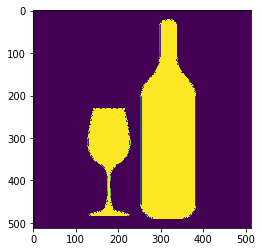

In [160]:
plt.imshow(mask)

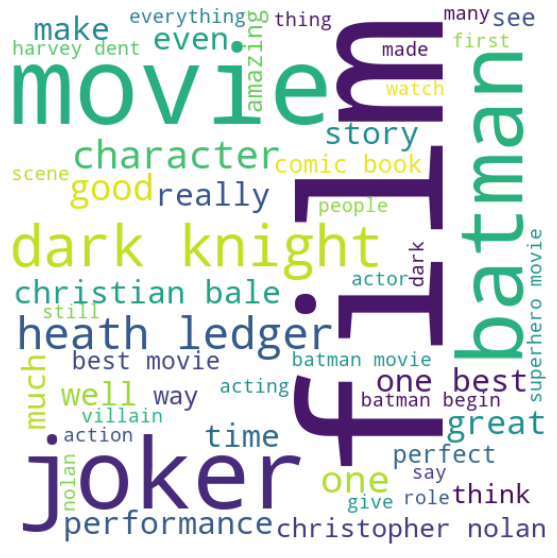

In [199]:
wordcloudPositive= WordCloud(max_words=50, mask=mask, background_color='white')
wordcloudPositive.generate(allPositve)
#plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.savefig("positive.png")

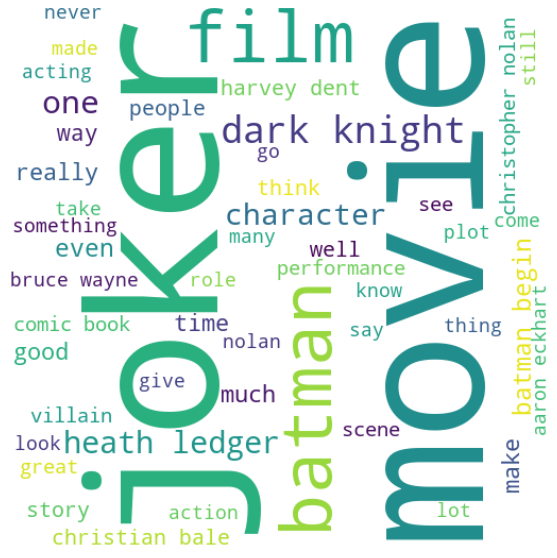

In [200]:
wordcloudNegative= WordCloud(max_words=50, mask=mask, background_color='white')
wordcloudNegative.generate(allNegative)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloudNegative, interpolation = 'bilinear')
plt.savefig("Negative.png")